In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.pca_var_model import PCAVARModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [4]:
model = PCAVARModel(num_pcs=2, lags = [1, 2, 3, 4], standardize_pre_post = True)
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [8]:
model.fit(df_inflation.query("yearmonth <= '2010-01-01'"))

Text(0.5, 1.0, 'Fraction of variance explained by each principal component')

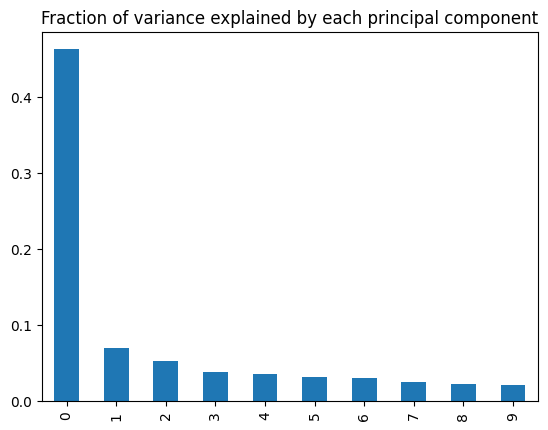

In [9]:
import matplotlib.pyplot as plt

pd.Series(model.all_eigenvalues).pipe(lambda x: x / x.sum()).head(10).plot.bar()
plt.title("Fraction of variance explained by each principal component")

In [10]:
(model.all_eigenvalues[0] + model.all_eigenvalues[1]) / sum(model.all_eigenvalues)

0.532580669038649

PC1 and PC2 seem to combine 95% of the variance in inflation together.

<Axes: xlabel='Country'>

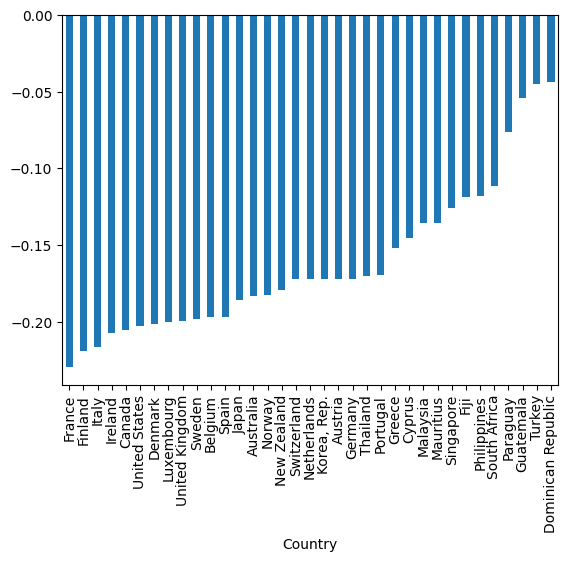

In [11]:
pd.Series(model.all_eigenvectors[:, 0], index = model.data_wide_columns).sort_values().plot.bar()

PC1 dominated by Peru and Argentina

# 3. Evaluation

In [12]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

In [13]:
preds = model.predict(df_inflation)
preds

,yearmonth,Country,inflation
7245,2023-04-01,Australia,0.016818
7246,2023-04-01,Austria,0.011773
7247,2023-04-01,Belgium,0.013593
7248,2023-04-01,Canada,0.013708
7249,2023-04-01,Cyprus,0.012103
7250,2023-04-01,Denmark,0.015508
7251,2023-04-01,Dominican Republic,0.017310
7252,2023-04-01,Fiji,0.016422
7253,2023-04-01,Finland,0.016989
7254,2023-04-01,France,0.015288


# 4. H-period ahead forecasting

In [14]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [16]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

,yearmonth,Country,inflation
0,2020-01-01,Australia,0.006428
1,2020-01-01,Austria,0.004321
2,2020-01-01,Belgium,0.004135
3,2020-01-01,Canada,0.004139
4,2020-01-01,Cyprus,0.002927
...,...,...,...
450,2023-01-01,Switzerland,0.010972
451,2023-01-01,Thailand,0.020220
452,2023-01-01,Turkey,0.084898
453,2023-01-01,United Kingdom,0.025145


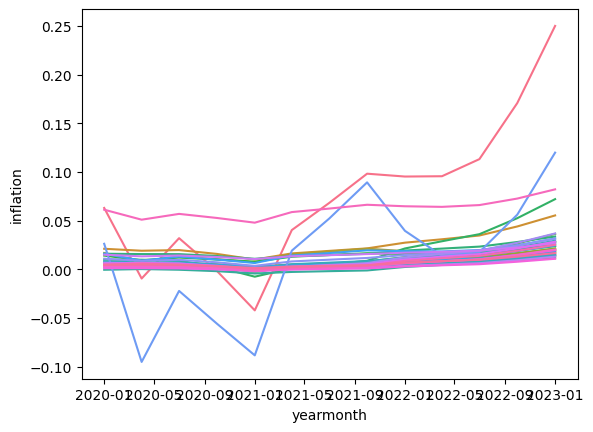

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [20]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
420,2022-07-01,"Korea, Rep.",0.015613,0.011352
421,2022-07-01,Luxembourg,0.009099,0.002584
422,2022-07-01,Malaysia,0.007944,0.011845
423,2022-07-01,Mauritius,0.016694,0.023855
424,2022-07-01,Netherlands,0.009305,0.040519
...,...,...,...,...
515,2023-01-01,Switzerland,0.010895,0.010084
516,2023-01-01,Thailand,0.020305,0.000463
517,2023-01-01,Turkey,0.082236,0.116249
518,2023-01-01,United Kingdom,0.025200,0.008814


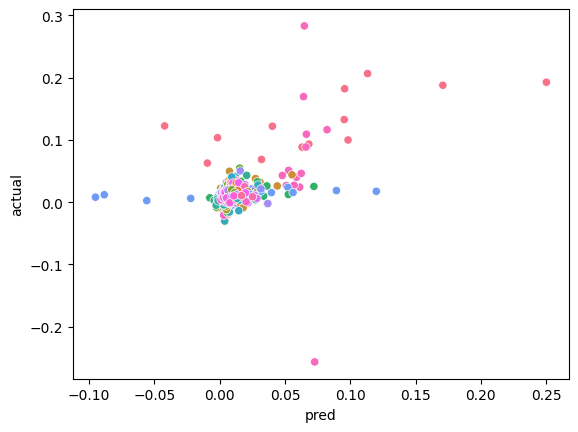

In [21]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [22]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.77e-38
Time:                        13:16:12   Log-Likelihood:                 1170.0
No. Observations:                 520   AIC:                            -2336.
Df Residuals:                     518   BIC:                            -2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.001      4.508      0.000       0.003       0.008
pred           0.7164      0.051     13.963      0.000       0.616       0.817
==============================================================================
Omnibus:                      268.285   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78744.668
Skew:                          -0.972   Prob(JB):                         0.00
Kurtosis:                      63.254   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.var.models["PC1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PC1   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           3.78e-70
Time:                        13:16:31   Log-Likelihood:                -408.92
No. Observations:                 208   AIC:                             835.8
Df Residuals:                     199   BIC:                             865.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.123     -0.061      0.951      -0.249       0.234
PC1_lag_1      0.5516      0.069      8.045      0.000       0.416       0.687
PC2_lag_1     -0.4628      0.121     -3.826      0.000      -0.701      -0.224
PC1_lag_2      0.1179      0.079      1.502      0.135      -0.037       0.273
PC2_lag_2      0.0399      0.144      0.278      0.781      -0.243       0.323
PC1_lag_3      0.0561      0.079      0.713      0.477      -0.099       0.211
PC2_lag_3      0.2156      0.143      1.509      0.133      -0.066       0.497
PC1_lag_4      0.2194      0.067      3.260      0.001       0.087       0.352
PC2_lag_4      0.2244      0.126      1.780      0.077      -0.024       0.473
==============================================================================
Omnibus:                       22.963   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.885
Skew:                           0.418   Prob(JB):                     2.21e-14
Kurtosis:                       5.561   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""